## Day 26 Lecture 2 Assignment

In this assignment, we will learn about linear regression model assumptions

In [39]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import bartlett
from scipy.stats import levene
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pylab
from scipy.stats import jarque_bera
from scipy.stats import normaltest


We will load the dataset below that describes the antioxidant quality of lager.

The variables are as follows:
    
The dataset contains 7 variables :

- tpc - Total phenolic content
- ma - melanoidin content
- dsa - DPPH radical scavenging activity
- asa - ABTS radical cation scavenging activity
- orac - Oxygen radical absorbance activity
- rp - Reducing Power
- mca - Metal Chelaing Activity

In [7]:
lager = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lager_antioxidant_reg.csv')

lager.head()

,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


We would like to predict the level of total phenolic content using the remaining 6 variables.

Start by removing the beer column since this column is the id for the observations.

In [8]:
#answer below:
lager = lager.drop(columns='beer')


Split the data into train and test subsets. Select 25% of the data to be in the test subset. Use `tpc` as the y variable.

In [11]:
# answer below:
X = lager.drop(columns='tpc')
y = lager['tpc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Next, we'll generate a linear model and make a residual vs. fit (homoscedasticity) plot. All Gauss-Markov assumptions should be evaluated on the training set.

How much heteroscedasticity is exhibited in the model?

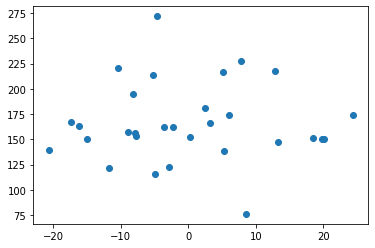

In [24]:
#answer below:
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_train)
residual = (y_train - prediction)

bart_stats = bartlett(residual, prediction)
lev_stats = levene(residual, prediction)

plt.scatter(residual, prediction)

Compute the VIF for all features in the model. You will need to add a constant to your data (make a new copy just for this) to compute this with statsmodels.

How collinear are your features?

In [28]:
# answer below:
new_data = add_constant(X)
vif = pd.Series([variance_inflation_factor(new_data.values, i) for i in range(new_data.shape[1])], index=new_data.columns)
vif

const    25.231110
ma        1.408874
dsa       2.752283
asa       1.824640
orac      1.631315
rp        2.357123
mca       1.485338
dtype: float64

Show a histogram of your error, and then plot the qq-plot for our errors (make sure to use a standardized line to compare them appropriately to the standard distribution.)

Remember to use training data.

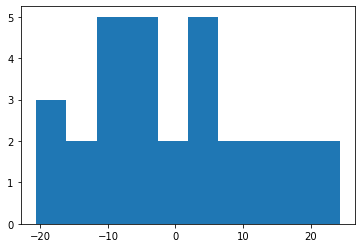

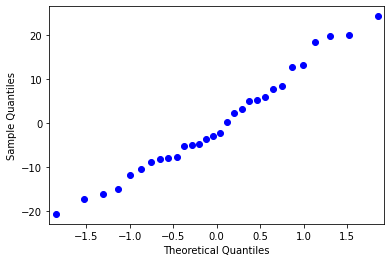

In [35]:
# answer below:
plt.hist(residual)
plt.show()

sm.qqplot(residual)
pylab.show()


Plot the actual test data against test predictions to see how well your model predicts new data.

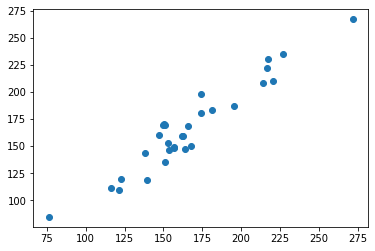

jarque bera: (1.1718668529252174, 0.5565860870817672)
normal test: NormaltestResult(statistic=1.3219784254094258, pvalue=0.5163403113821201)


In [41]:
# answer below:
plt.scatter(prediction, y_train)
plt.show()
jb = jarque_bera(residual)
norm = normaltest(residual)
print('jarque bera:', jb)
print('normal test:', norm)
